## 코사인 유사도(Cosine Similarity)
문장의 유사도를 측정할 때 사용

In [1]:
import numpy as np

In [3]:
v1, v2, v3 = np.array([1,1,0]), np.array([2,1,0]), np.array([0,0,1])
# v1_norm 원점에서 v1까지의 유클리드 거리
v1_norm = np.sqrt(np.sum(np.square(v1)))        # [1,1,0] 각 요소를 제곱해서 더한값을 루트씌움
v2_norm = np.sqrt(np.sum(np.square(v2)))    
v3_norm = np.sqrt(np.sum(np.square(v3)))
v1_norm, v2_norm, v3_norm

(1.4142135623730951, 2.23606797749979, 1.0)

In [5]:
# v1과 v2의 유사도, v1과 v3의 유사도
cos12 = np.dot(v1, v2) / (v1_norm * v2_norm)
cos13 = np.dot(v1, v3) / (v1_norm * v3_norm)
cos12, cos13

# v1, v2는 유사
# v1, v3는 관련이 없다
# v2, v3는 관련이 없다(0)

(0.9486832980505138, 0.0)

In [6]:
def cos_similarity(v1, v2):
    v1_norm = np.sqrt(np.sum(np.square(v1)))
    v2_norm = np.sqrt(np.sum(np.square(v2)))
    return np.dot(v1, v2) / (v1_norm * v2_norm)

- 문장의 코사인 유사도

In [7]:
doc_list = [
    'If you take the blue pill, the story ends',
    'If you take the red pill, you stay in Wonderland',
    'If you take the red pill, I show you how deep the rabbit hole goes'
]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(stop_words='english')
doc_cv = cvect.fit_transform(doc_list)
doc_array = doc_cv.toarray()
doc_array

array([[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0]], dtype=int64)

In [9]:
print(f'문장1 vs 문장2: {cos_similarity(doc_array[0], doc_array[1]):.4f}')
print(f'문장1 vs 문장3: {cos_similarity(doc_array[0], doc_array[2]):.4f}')
print(f'문장2 vs 문장3: {cos_similarity(doc_array[1], doc_array[2]):.4f}')

문장1 vs 문장2: 0.2500
문장1 vs 문장3: 0.2041
문장2 vs 문장3: 0.4082


- Scikit_Learn 코사인 유사도

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
cosine_similarity(doc_cv, doc_cv)

array([[1.        , 0.25      , 0.20412415],
       [0.25      , 1.        , 0.40824829],
       [0.20412415, 0.40824829, 1.        ]])

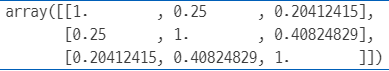

- [1.        , 0.25      , 0.20412415]
    - [0]: v1-v1 유사값,   [1]: v1-v2 유사값, [2]:v1-v3 유사값
- [0.25      , 1.        , 0.40824829]
    - [0]: v2-v1 유사값,   [1]: v2-v2 유사값, [2]:v2-v3 유사값
- [0.20412415, 0.40824829, 1.        ]
    - [0]: v3-v1 유사값,   [1]: v3-v2 유사값, [2]:v3-v3 유사값


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer(stop_words='english')
doc_tv = tvect.fit_transform(doc_list)
cosine_similarity(doc_tv, doc_tv)

array([[1.        , 0.11141304, 0.08587424],
       [0.11141304, 1.        , 0.24414989],
       [0.08587424, 0.24414989, 1.        ]])